**<h1 align="center">Machine Learning Project</h1>**

**Group members:**<br> 
Barata Diogo - 20240258 <br>
Deschanel Chloé - 20240693  <br>
Leandro Lara  - 20211632 <br>
Parracho Érica - 20240583 <br>
Walihullah Mohammad - 20230768 <br>

This notebook is our main one, where we develop a predictive model to help the New York Workers' Compensation Board (WCB) automate their claim handling process. Specifically, we aim to predict Claim Injury Type. 

# Table of Contents
* [1. Project Setup](#chapter1)
    * [1.1. Imports](#sub-section-1_1)
    * [1.2. Loading Data](#sub-section-1_2)
    * [1.3. Data Type and Duplicates](#sub-section-1_3)
* [2. Data Preparation and Preprocessing](#chapter2)
    * [2.1. Coherence Checking](#sub-section-2_1)
        * [2.1.1. Incoherences in the Age variables](#sub-section-2_1_1)
        * [2.1.2. Incoherences in Carrier Name](#sub-section-2_1_2)
        * [2.1.3. Incoherences in Zip codes](#sub-section-2_1_3)
        * [2.1.4. Unknown Values](#sub-section-2_1_4)
        * [2.1.5. Dates](#sub-section-2_1_5)
        * [2.1.6. Codes](#sub-section-2_1_6)
    * [2.2. Feature Engineering](#sub-section-2_2)
    * [2.3. Splitting the Data](#sub-section-2_3)
    * [2.4. Outliers](#sub-section-2_4)
    * [2.5. Treating missing values](#sub-section-2_5)
        * [2.5.1. Removing Variables](#sub-section-2_5_1)
        * [2.5.2. Imputing Missing Values](#sub-section-2_5_2)
    * [2.6. Encoding Categorical Variables](#sub-section-2_6)
    * [2.7. Scaling the Data](#sub-section-2_7)
    * [2.8. Feature Selection](#sub-section-2_8)
        * [2.8.1. Univariate variables](#sub-section-2_8_1)
        * [2.8.2. Correlation Indices](#sub-section-2_8_2)
        * [2.8.3. Chi-Square](#sub-section-2_8_3)
        * [2.8.4. Wrapper Methods - RFE](#sub-section-2_8_4)
        * [2.8.5. Embedded Methods - Lasso](#sub-section-2_8_5)
        * [2.8.6. Final Drops](#sub-section-2_8_6)
* [3. Modeling](#chapter3)
    * [3.1. Models](#sub-section-3_1)
        * [3.1.1. Logistic Regression](#sub-section-3_1_1)
        * [3.1.2. Naive Bayes](#sub-section-3_1_2)
        * [3.1.3. KNN](#sub-section-3_1_3)
        * [3.1.4. Decision Tree](#sub-section-3_1_4)
        * [3.1.5. Gradient Boosting](#sub-section-3_1_5)
        * [3.1.6. Random Forest Classifier](#sub-section-3_1_6)
        * [3.1.7. Neural Networks](#sub-section-3_1_7)
        * [3.1.8. Comparing Models](#sub-section-3_1_8)
    * [3.2. Optimization](#sub-section-3_2)
        * [3.2.1. Oversampling](#sub-section-3_2_1)
        * [3.2.2. Hyperparameter tuning](#sub-section-3_2_2)
            * [3.2.2.1. Gradient Boosting](#sub-section-3_2_2_1)
            * [3.2.2.2. Random Forest](#sub-section-3_2_2_2)
            * [3.2.2.3. KNN](#sub-section-3_2_2_3)
            * [3.2.2.4. Neural Networks](#sub-section-3_2_2_4)
        * [3.2.3. Comparing Results](#sub-section-3_2_3)
    * [3.3. Best Model](#sub-section-3_3)
* [4. Open Ended Section](#chapter4)
    * [4.1. Agreement Reached](#sub-section-4_1)
    * [4.2. Interactive Dashboard](#sub-section-4_2)
* [5. Deployment](#chapter5)

<a class="anchor" id="chapter1"></a>

# 1. Project Setup

</a>

<a class="anchor" id="sub-section-1_1"></a>

## 1.1. Imports

</a>

In [1]:
import numpy as np
import pandas as pd
import re
from datetime import date

# Created functions in .py file
import functions

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Partition
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder

# Feature Selection - Filter Methods
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif

# Feature Selection - Wrapper Methods
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Feature Selection - Embedded Methods
from sklearn.linear_model import LassoCV

# Modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

# Performance Metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score

# Hyperparameter tuning
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

# Open-ended section
from sklearn.base import clone
import pickle
import copy


# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="sub-section-1_2"></a>

## 1.2. Loading data

</a>

In [2]:
# Import all the data that will be used
train_data_original = pd.read_csv("train_data.csv")
test_original = pd.read_csv("test_data.csv")

In [3]:
train_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [4]:
# Display all columns
pd.set_option('display.max_columns', None)

# Set Claim Identifier as index
train_data_original.set_index('Claim Identifier', inplace = True)
test_original.set_index('Claim Identifier', inplace = True)

In [5]:
# Create a copy to work on 
train_data = train_data_original.copy()
test=test_original.copy()

In [6]:
# Display & verify the data is correctly imported
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [7]:
# Display & verify if test data is correctly imported
test.head(1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,BRONX,N,NYC,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1


In [8]:
# Adding columns that are not present on test and filling them with 'O' to ensure conistency
test.insert(28, 'Agreement Reached', '0')
test.insert(29, 'WCB Decision', '0')

In [9]:
test.head(1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,BRONX,N,NYC,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,0,0,1


<a class="anchor" id="sub-section-1_3"></a>

## 1.3. Data Type and Duplicates

</a>

In [10]:
# Change dates to datetime type
dates = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
train_data[dates] = train_data[dates].apply(pd.to_datetime)
test[dates] = test[dates].apply(pd.to_datetime)

train_data[dates].info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Accident Date       570337 non-null  datetime64[ns]
 1   Assembly Date       593471 non-null  datetime64[ns]
 2   C-2 Date            559466 non-null  datetime64[ns]
 3   C-3 Date            187245 non-null  datetime64[ns]
 4   First Hearing Date  150798 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 27.2 MB


In [11]:
# Check for duplicate Claim Identifiers
train_data[train_data.index.duplicated() == True]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
292668076,NaT,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Drop the duplicated index, as it seems to be an error
train_data = train_data[~train_data.index.duplicated(keep = 'first')]

In [13]:
# Check for duplicate rows
duplicates = train_data.duplicated().sum()
print(f"There are {duplicates} duplicated rows.")

There are 18349 duplicated rows.


In [14]:
# Drop duplicated rows
train_data.drop_duplicates(inplace = True) 

***For the exploratory data analysis, please refer to the notebook called "Group_12_EDA_notebook.ipynb".***

<a class="anchor"  id="chapter2"></a>

# 2. Data Preparation and Preprocessing

</a>

<a class="anchor" id="sub-section-2_1"></a>

## 2.1. Coherence Checking

</a>

Before starting the pre-processing phase, the data needs to be checked for any inconsistencies in variables. 

<a class="anchor" id="sub-section-2_1_1"></a>

###  2.1.1. Incoherences in the Age variables

</a>

In [15]:
# Get cases where the age at the time of injury doesn't match with birth year and year of the accident
len(train_data[(train_data['Accident Date'].dt.year - train_data['Birth Year']-train_data['Age at Injury']>1)])

24846

In [16]:
# Count how often each Age at Injury value appears where ages don't match and Birth Year is valid
train_data[((train_data['Accident Date'].dt.year - train_data['Birth Year']) - train_data['Age at Injury']>1) & (train_data['Birth Year']!= 0)]['Age at Injury'].value_counts()

Age at Injury
0.0    93
Name: count, dtype: int64

In these 93 cases, the Birth Year is valid, but the calculated age (based on the Accident Date and Birth Year) differs from the reported Age at Injury by more than 1 year.

In [17]:
# Count how often each Birth Year value appears where ages don't match and Age at Injury is valid
train_data[((train_data['Accident Date'].dt.year - train_data['Birth Year']) - train_data['Age at Injury']>1) & (train_data['Age at Injury']!= 0)]['Birth Year'].value_counts()

Birth Year
0.0    23155
Name: count, dtype: int64

In these 23155 cases, the Age at Injury is valid, but the calculated age (based on the Accident Date and Birth Year) differs from the reported Age at Injury by more than 1 year.

In [18]:
# Count how often Birth Year and Age at Injury are 0, and have inconsistencies in the age 
train_data[((train_data['Accident Date'].dt.year - train_data['Birth Year']) - train_data['Age at Injury']>1) & (train_data['Age at Injury']== 0) & (train_data['Birth Year']== 0)]['Birth Year'].value_counts()

Birth Year
0.0    1598
Name: count, dtype: int64

There are 1598 cases where both Birth Year and Age at Injury are recorded as 0, the calculated age differs from the Age at Injury by more than 1 year.

The inconsistencies found suggest that either the Age at Injury is 0, the Birth Year is 0, or both. With the available information, these inconsistencies need to be corrected.

In [19]:
# Missing values in Age at Injury and Birth Year

# Replace values where there is a 0 in Age at Injury and Birth Year with NaN
train_data['Age at Injury'] = train_data['Age at Injury'].replace(0, np.nan)
train_data['Birth Year'] = train_data['Birth Year'].replace(0, np.nan)

# Identify rows where one value is NaN and not the other, and calculate Birth Year
condition = train_data['Birth Year'].isna() & train_data['Age at Injury'].notna()
train_data.loc[condition, 'Birth Year'] = train_data['Accident Date'].dt.year - train_data['Age at Injury']

# Identify rows where one value is NaN and not the other, and calculate Age at Injury
condition = train_data['Age at Injury'].isna() & train_data['Birth Year'].notna()
train_data.loc[condition, 'Age at Injury'] = train_data['Accident Date'].dt.year - train_data['Birth Year']

In [20]:
# Repeat the same process for test
test['Age at Injury'] = test['Age at Injury'].replace(0, np.nan)
test['Birth Year'] = test['Birth Year'].replace(0, np.nan)

condition = test['Birth Year'].isna() & test['Age at Injury'].notna()
test.loc[condition, 'Birth Year'] = test['Accident Date'].dt.year - test['Age at Injury']
condition = test['Age at Injury'].isna() & test['Birth Year'].notna()
test.loc[condition, 'Age at Injury'] = test['Accident Date'].dt.year - test['Birth Year']

In [21]:
# Filter rows where the Age at Injury is greater than 90
len(train_data[train_data['Age at Injury']>90])

259

In [22]:
# Filter rows where the Age at Injury is lower than 14
len(train_data[train_data['Age at Injury']<14])

47

Regarding work-related injuries, the age range should probably be between 14 and 80. This could be due to an error in the data set or a specific circumstance. As a general rule, the FLSA sets 14 years old as the minimum age for employment. Also, there are not many people working after the age of 90, so we will put this as missing values.

In [23]:
# Replace with NaN if Age at Injury values are outside of the range 14 and 90 years old
train_data['Age at Injury'] = np.where( (train_data['Age at Injury'] > 90) | (train_data['Age at Injury'] < 14),np.nan,train_data['Age at Injury'])
test['Age at Injury'] = np.where( (test['Age at Injury'] > 90) | (test['Age at Injury'] < 14),np.nan, test['Age at Injury'])

In [24]:
# Since the last accident date was in 2023, we cannot have any birth years bigger than 2008 
len(train_data[train_data['Birth Year']>2008])

34

In [25]:
# Replace with NaN if Birth Year is greater than 2008 in train and test sets
train_data['Birth Year'] = np.where( train_data['Birth Year']>2008, np.nan, train_data['Birth Year'])
test['Birth Year'] = np.where(test['Birth Year']>2008, np.nan, test['Birth Year'])

<a class="anchor" id="sub-section-2_1_2"></a>

###  2.1.2. Incoherences in Carrier Name

</a>

In [26]:
# This code was re-run after trials to create the function clean carrier name to see the results
#unique_carrier_name=sorted(train_data["Carrier Name"].dropna().unique())
#print(unique_carrier_name[:100])

In [27]:
# Check the number of carrier names after cleaning
cleaned_carrier_names = train_data['Carrier Name'].apply(functions.clean_carrier_name)

unique_original = train_data['Carrier Name'].nunique()
unique_cleaned = cleaned_carrier_names.nunique()

print(f"Number of carrier names without cleaning: {unique_original}") 
print(f"Number of unique carrier names after cleaning: {unique_cleaned}")

Number of carrier names without cleaning: 2046
Number of unique carrier names after cleaning: 1560


After checking how many unique carrier names remain after removing punctuation, there are some values that represent the same carrier but with different formats (e.g. abbreviations, added commas or dots). It is important to note that there may be other variations of these values, which can impact the model.

In [28]:
# Clean Carrier Name using clean_carrier_name function in train and test
train_data["Carrier Name"] = train_data["Carrier Name"].apply(functions.clean_carrier_name)
test["Carrier Name"] = test["Carrier Name"].apply(functions.clean_carrier_name)

<a class="anchor" id="sub-section-2_1_3"></a>

###  2.1.3. Incoherences in Zip codes

</a>

Assuming the dataset is based in the USA, a valid US postal code consists of 5 digits. Therefore, the zip codes in the dataset need to be checked to ensure they meet this condition.

In [29]:
# Check invalid post codes
invalid_codes = functions.invalid_zip_codes(train_data['Zip Code'])

print(list(set(invalid_codes)))

['K1N0A', 'F94A0', 'P7G', 'L2N3A', 'L0L2N', 'J0L1B', '7006', 'N6C4E', 'V6Z3G', 'L5N7C', 'V4W2N', 'Z2E1N', 'HIV3S', 'L2H 3', 'L1C0K', 'L3J0R', 'L0R 2', 'M6S5B', 'M9N1B', 'H1G0A', 'J5K', 'L2A 5', 'L6H 3', 'N0A 1', 'L9W4X', 'L1G', 'CP 59', 'K9J', 'JMAKN', 'M5V 3', 'M6K3C', 'SLV', 'M4E1S', 'J1H2Y', 'H2T2W', 'E1G5R', 'S7W 1', 'SG2OL', 'M4C5K', 'K9K 1', 'JMDMR', 'N2P 1', 'T4R1E', 'H3COW', 'V1M2B', 'L7L 6', 'F42E0', 'L2W 1', 'R3L1B', 'L2A1R', 'N0L1B', 'V6ZOG', 'L1A 3', 'L2A 1', 'L9H1N', 'B3M 3', 'L0S1T', 'MIN2M', 'N4K 6', 'S7W', 'L7T 4', 'L2P0A', 'L1N 5', 'JMCTY', 'L4H1K', 'L2A 3', 'L8G 1', 'DH8 9', 'M5R', 'L9W', 'AB106', 'V6B2M', 'L1E 3', 'L37 6', 'L0S1N', '22-40', 'L0R 1', 'B3E1A', 'K6H6Y', 'L6Y 1', 'L1V 3', 'L7C 3', 'T1J5G', 'M5R2Z', 'T2V', 'M6H 4', 'V6T1Z', 'L2H0H', 'K2L 4', 'V1W1Y', '.1605', 'T2X3P', 'K9K 2', 'K6H2L', 'K9H1P', 'L2N 3', 'KOC 1', 'L4A0G', 'S7W1B', 'TS7 8', 'S7R 0', 'L9L1B', 'T1B0P', 'V1M 1', 'H1Y2W', 'T6R 0', 'M3K2B', 'T1S', 'JMACE', 'H9S', 'V6T5C', 'K9A 0', 'JMDWD', 'H1V2

In [30]:
# Check if there are rows with 00000 or 99999 as postal code, which are not valid postal codes
len(train_data[(train_data['Zip Code'] == "00000") | (train_data['Zip Code'] == "99999")])

81

Some of these values contain letters, so they are not valid in the US, but could potentially be valid for other countries (e.g. Canada). Other values, such as "UNKNO", are not valid and can be considered as placeholders

In [31]:
# Replace invalid zip codes with NaN
train_data['Zip Code'] = functions.replace_invalid_zip_codes(train_data['Zip Code'])
test['Zip Code'] = functions.replace_invalid_zip_codes(test['Zip Code'])

In [32]:
# Replace 00000 and 99999 postal codes with NaN to be filled later
train_data['Zip Code'].replace("00000", np.nan, inplace=True)
test['Zip Code'].replace("00000", np.nan, inplace=True)

train_data['Zip Code'].replace("99999", np.nan, inplace=True)
test['Zip Code'].replace("99999", np.nan, inplace=True)

<a class="anchor" id="sub-section-2_1_4"></a>

###  2.1.4. Unknown Values

</a>

In [33]:
train_data["Gender"].value_counts()

Gender
M    335217
F    234051
U      4711
X        46
Name: count, dtype: int64

In [34]:
# Check 'UNKNOWN' Carrier Type
len(train_data[train_data["Carrier Type"]=="UNKNOWN"])

1774

In [35]:
train_data[train_data["Carrier Type"]=="UNKNOWN"]["Carrier Name"].value_counts()

Carrier Name
*** CARRIER UNDETERMINED ***    1774
Name: count, dtype: int64

The values of some variables represent unknown entries and should perhaps be filled with NaN. However, they have different distributions of the target variable, which needs to be considered.

In [36]:
#print(list(set(train_data['County of Injury'])))
len(train_data[train_data['County of Injury']=='UNKNOWN']['Claim Injury Type'])

1196

In [37]:
# For County of Injury, replace as NaN to be correctly filled later
train_data['County of Injury'] = np.where( train_data['County of Injury']=='UNKNOWN', np.nan, train_data['County of Injury'])
test['County of Injury'] = np.where( test['County of Injury']=='UNKNOWN', np.nan, test['County of Injury'])

In [38]:
train_data['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    571411
Y      2609
U         5
Name: count, dtype: int64

In [39]:
# Alternative Dispute Resolution, replace unknown values with 'N'
train_data['Alternative Dispute Resolution'].replace('U', 'N', inplace=True)
test['Alternative Dispute Resolution'].replace('U', 'N', inplace=True)

<a class="anchor" id="sub-section-2_1_5"></a>

### 2.1.5. Dates

</a>

In [40]:
# Check cases when the First Hearing happened before the Accident Date
len(train_data[train_data['First Hearing Date'] < train_data['Accident Date']])

74

In [41]:
# Check cases when the Assembly Date happened before the Accident Date
len(train_data[train_data['Assembly Date'] < train_data['Accident Date']])

1407

The cases where the assembly date happened before the accident must be errors. They will be replaced with the oldest date provided for that individual, which we believe is the most accurate represenation.

In [42]:
# Replace Accident Date with the oldest date provided for that individual
train_data['Accident Date']=np.where(train_data['Assembly Date'] < train_data['Accident Date'],train_data[dates].min(axis=1),
                                     train_data['Accident Date'])
test['Accident Date']=np.where(test['Assembly Date'] < test['Accident Date'],test[dates].min(axis=1),
                                     test['Accident Date'])

<a class="anchor" id="sub-section-2_1_6"></a>

### 2.1.6. Codes

</a>

From checking invalid codes in the descriptive statistics, we know that Part of Body Code has a negative value and it is not present in WCIO codes.

In [43]:
train_data[train_data['WCIO Part Of Body Code']==-9]['WCIO Part Of Body Description'].unique()

array(['MULTIPLE'], dtype=object)

After observing the descriptions, the most similar code description to -9 is the code 90 'MULTIPLE BODY PARTS (INCLUDING BODY)', so we will relace code -9 with code 90.

In [44]:
train_data['WCIO Part Of Body Code']=np.where(train_data['WCIO Part Of Body Code'] ==-9,90,train_data['WCIO Part Of Body Code'])
test['WCIO Part Of Body Code']=np.where(test['WCIO Part Of Body Code'] ==-9,90,test['WCIO Part Of Body Code'])

Below, we are checking for cases where there are multiple codes with the same description or multiple descriptions with the same code.

In [45]:
# Check WCIO Nature of Injury Code
duplicated_codes, duplicated_descriptions = functions.check_code_description_duplicates(train_data,'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')
print("Nature of Injury duplicated codes:", duplicated_codes)
print("Nature of Injury duplicated descriptios:", duplicated_descriptions)

Nature of Injury duplicated codes: Series([], Name: WCIO Nature of Injury Description, dtype: int64)
Nature of Injury duplicated descriptios: Series([], Name: WCIO Nature of Injury Code, dtype: int64)


In [46]:
# Check WCIO Cause of Injury Code
duplicated_codes, duplicated_descriptions = functions.check_code_description_duplicates(train_data,'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')
print("Cause of Injury duplicated codes:", duplicated_codes)
print("Cause of Injury duplicated descriptios:", duplicated_descriptions)

Cause of Injury duplicated codes: Series([], Name: WCIO Cause of Injury Description, dtype: int64)
Cause of Injury duplicated descriptios: WCIO Cause of Injury Description
OBJECT BEING LIFTED OR HANDLED    3
REPETITIVE MOTION                 2
Name: WCIO Cause of Injury Code, dtype: int64


In [47]:
train_data[train_data['WCIO Cause of Injury Description'].isin(['OBJECT BEING LIFTED OR HANDLED', 'REPETITIVE MOTION'])]['WCIO Cause of Injury Code'].unique()

array([97., 79., 17., 66., 94.])

In [48]:
# Check WCIO Part of Body Code
duplicated_codes, duplicated_descriptions = functions.check_code_description_duplicates(train_data,'WCIO Part Of Body Code', 'WCIO Part Of Body Description')
print("Part Of Body duplicated codes:", duplicated_codes)
print("Part Of Body duplicated descriptios:", duplicated_descriptions)

Part Of Body duplicated codes: WCIO Part Of Body Code
90.0    2
Name: WCIO Part Of Body Description, dtype: int64
Part Of Body duplicated descriptios: WCIO Part Of Body Description
DISC           2
SOFT TISSUE    2
SPINAL CORD    2
Name: WCIO Part Of Body Code, dtype: int64


In [49]:
train_data[train_data['WCIO Part Of Body Description'].isin(['DISC', 'SOFT TISSUE', 'SPINAL CORD '])]['WCIO Part Of Body Code'].unique()

array([18., 25., 43., 22.])

In [50]:
# Check Industry Code
duplicated_codes, duplicated_descriptions = functions.check_code_description_duplicates(train_data, 'Industry Code', 'Industry Code Description')
print("Industry duplicated codes:", duplicated_codes)
print("Industry descriptios:", duplicated_descriptions)

Industry duplicated codes: Series([], Name: Industry Code Description, dtype: int64)
Industry descriptios: Industry Code Description
MANUFACTURING                     3
RETAIL TRADE                      2
TRANSPORTATION AND WAREHOUSING    2
Name: Industry Code, dtype: int64


In [51]:
train_data[train_data['Industry Code Description'].isin(['MANUFACTURING', 'RETAIL TRADE', 'TRANSPORTATION AND WAREHOUSING'])]['Industry Code'].unique()

array([44., 31., 48., 45., 49., 33., 32.])

After reviewing the specific codes, we saw that the duplicates are not mistakes, but rather refer to different types of specific industries or injuries. Since we will be using only the codes later, we will leave the descriptions as is.

<a class="anchor" id="sub-section-2_2"></a>

## 2.2. Feature Engineering

</a>

In [52]:
# Calculate the current Age based on Birth Year and current date, as Age is easier to understand than Birth Year
train_data["Age"]= date.today().year-train_data["Birth Year"]
test["Age"]= date.today().year-test["Birth Year"]

In [53]:
# Create a binary variable with 1 if the C3 date is no an empty value and 0 otherwise
train_data["C3_Received"] = train_data["C-3 Date"].notna().astype(int)
test["C3_Received"] = test["C-3 Date"].notna().astype(int)

In [54]:
# Create a binary variable with 1 if the C2 date is no an empty value and 0 otherwise
train_data["C2_Received"] = train_data["C-2 Date"].notna().astype(int)
test["C2_Received"] = test["C-2 Date"].notna().astype(int)

In [55]:
# Create a binary variable with 1 if the First Hearing is no an empty value and 0 otherwise
train_data["First_Hearing"] = train_data["First Hearing Date"].notna().astype(int)
test["First_Hearing"] = test["First Hearing Date"].notna().astype(int)

In [56]:
# Create a variable with the number of days between the current date and the Assembly Date
train_data['Days_from_Assembly Date'] = (pd.Timestamp.today() - train_data['Assembly Date']).dt.days
test['Days_from_Assembly Date'] = (pd.Timestamp.today() - test['Assembly Date']).dt.days

In [57]:
# Create a variable and extract the accident year from the Accident Date to facilitate understanding 
train_data["Accident Year"] = train_data["Accident Date"].dt.year
test["Accident Year"] = test["Accident Date"].dt.year

In [58]:
# Create a binary variable with 1 if the individual has a dependent and O if not
train_data['Has_Dependents'] = train_data['Number of Dependents'].apply(lambda x: 1 if x > 0 else 0)
test['Has_Dependents'] = test['Number of Dependents'].apply(lambda x: 1 if x > 0 else 0)

In [59]:
# Do the log transformation of Wage to help reduce skewness in the data (+1 ensures all values have a log)
train_data['Average Weekly Wage'] = train_data['Average Weekly Wage'].apply(lambda x: np.log(x + 1))
test['Average Weekly Wage'] = test['Average Weekly Wage'].apply(lambda x: np.log(x + 1))

In [60]:
# Do the log transformation of IME-4 Count to help reduce skewness in the data (+1 ensures all values have a log)
train_data['IME-4 Count'] = train_data['IME-4 Count'].apply(lambda x: np.log(x + 1))
test['IME-4 Count'] = train_data['IME-4 Count'].apply(lambda x: np.log(x + 1))

**Some other variables that were created:**

In [61]:
# May not be useful as there are many missing values

#train_data['Days From Accident'] = (train_data['First Hearing Date'] - train_data['Accident Date']).dt.days
#train_data['Days From Assembly to Hearing'] = (train_data['First Hearing Date'] - train_data['Assembly Date']).dt.days
#train_data['Days From Accident to Assembly'] = (train_data['Assembly Date'] - train_data['Accident Date']).dt.days
#train_data['Days_from_accident'] = (pd.Timestamp.today() - train_data['Accident Date']).dt.days
#train_data['Days_from_C-2'] = (pd.Timestamp.today() - train_data['C-2 Date']).dt.days

**Dropping variables:**

After creating the variables, the ones that will not be useful are removed from train_data and test.

In [62]:
train_data.drop('Birth Year', axis = 1, inplace = True)
train_data.drop('C-3 Date', axis = 1, inplace = True) 
train_data.drop("First Hearing Date", axis = 1, inplace = True)
train_data.drop("Accident Date", axis = 1, inplace = True)
train_data.drop("Assembly Date", axis = 1, inplace = True)
train_data.drop("C-2 Date", axis = 1, inplace = True)

test.drop('Birth Year', axis = 1, inplace = True)
test.drop('C-3 Date', axis = 1, inplace = True) 
test.drop("First Hearing Date", axis = 1, inplace = True)
test.drop("Accident Date", axis = 1, inplace = True)
test.drop("Assembly Date", axis = 1, inplace = True)
test.drop("C-2 Date", axis = 1, inplace = True)

The description columns are redundant because they provide textual explanations of the code columns. Having both columns could introduce duplicated information, so they will be dropped.

In [63]:
train_data.drop('Industry Code Description', axis = 1, inplace = True)
train_data.drop('WCIO Cause of Injury Description', axis = 1, inplace = True)
train_data.drop('WCIO Nature of Injury Description', axis = 1, inplace = True)
train_data.drop('WCIO Part Of Body Description', axis = 1, inplace = True)

test.drop('Industry Code Description', axis = 1, inplace = True)
test.drop('WCIO Cause of Injury Description', axis = 1, inplace = True)
test.drop('WCIO Nature of Injury Description', axis = 1, inplace = True)
test.drop('WCIO Part Of Body Description', axis = 1, inplace = True)

<a class="anchor" id="sub-section-2_3"></a>

## 2.3. Splitting the Data

</a>


We used the **hold-out method** to split the dataset, dividing it into separate training (80% of the data) and validation (20% of the data) sets. Since we have class imbalance, we also want to guarantee that both data sets have the same distribution of the target variable, so we used stratified sampling.

There are some rows where the target is missing (the only variable from the orignal dataset that was not missing was "Assembly Date"), so we will need to remove them before splitting to do the stratification.

In [64]:
train_data.dropna(subset=["Claim Injury Type"],inplace=True)

In [65]:
# Split the  data set into features and target 
data = train_data.drop(columns=["Claim Injury Type"])
target = train_data["Claim Injury Type"]

In [66]:
# Split into the train and valiations sets
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.2, random_state=5, stratify=target)

<a class="anchor" id="sub-section-2_4"></a>

## 2.4. Outliers

</a>

As we saw in the visualizations, there appears to be outliers in some variables. To detect and replace them, we will use the **Inter Quartile Range (IQR)** method.

In [67]:
numerical_columns = ['Age at Injury', 'Average Weekly Wage', 'Number of Dependents', 'Age','IME-4 Count', 
                     'Accident Year','Days_from_Assembly Date']

In [68]:
# Calculate the percentage of outliers in each metric feature
removed_percentages = {}
for col in numerical_columns:
    removed_percentages[col] = functions.calculate_percentage_outliers(X_train, col)
    print(f"Percentage of data removed for {col}: {removed_percentages[col]:.2f}%")

Percentage of data removed for Age at Injury: 0.01%
Percentage of data removed for Average Weekly Wage: 0.00%
Percentage of data removed for Number of Dependents: 0.00%
Percentage of data removed for Age: 0.06%
Percentage of data removed for IME-4 Count: 0.06%
Percentage of data removed for Accident Year: 0.85%
Percentage of data removed for Days_from_Assembly Date: 0.00%


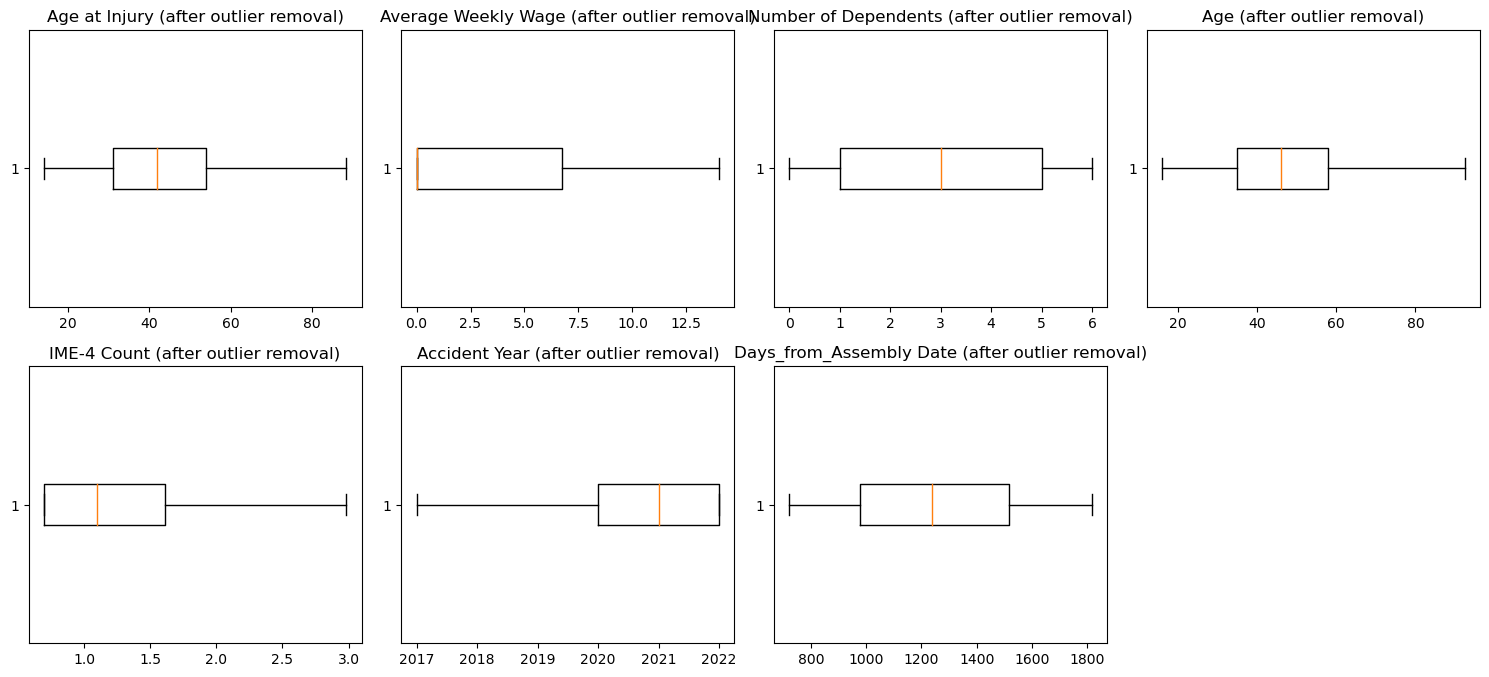

In [69]:
X_train_cleaned = X_train.copy()
X_val_cleaned = X_val.copy()    

for col in numerical_columns:
    functions.replace_outliers(X_train_cleaned,X_val_cleaned, col)
    functions.replace_outliers(X_train_cleaned,X_train_cleaned, col)
    functions.replace_outliers(X_train_cleaned,test, col)
    
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(X_train_cleaned[col].dropna(), vert=False)
    plt.title(f'{col} (after outlier removal)')
plt.tight_layout()
plt.show()

We can see that some variables continue to have extreme variables after outlier removal with IQR.

<a class="anchor" id="sub-section-2_5"></a>

## 2.5. Treating Missing Values

</a>

<a class="anchor" id="sub-section-2_5_1"></a>

###  2.5.1. Removing Variables

</a>

In [70]:
# Check variables with more than 80% missing values 
columns_to_drop = train_data.columns[train_data.isnull().mean() > 0.8] 
columns_to_drop

Index(['OIICS Nature of Injury Description'], dtype='object')

In [71]:
# Remove variables with more than 80% missing values
X_train_cleaned = X_train_cleaned.drop(columns=columns_to_drop)
X_val_cleaned = X_val_cleaned.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

<a class="anchor" id="sub-section-2_5_2"></a>

### 2.5.2. Imputing Missing Values

</a>

In [72]:
# Get remaining columns with missing values
print(X_train_cleaned.columns[X_train_cleaned.isnull().any()])

Index(['Age at Injury', 'Average Weekly Wage', 'County of Injury',
       'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Age', 'Accident Year'],
      dtype='object')


As the assembly does not have any missing values and the difference between accident and assembly date in almost all cases is less than an year, we can use it to input a good approximation for those variables. 

In [73]:
# Count how many values would be imputed 
birth_year_condition = X_train_cleaned['Age'].isna() & X_train_cleaned['Age at Injury'].notna()
print(X_train_cleaned[birth_year_condition].shape[0])

age_at_injury_condition = X_train_cleaned['Age at Injury'].isna() & X_train_cleaned['Age'].notna()
print( X_train_cleaned[age_at_injury_condition].shape[0])

0
2728


In [74]:
# Only impute Age at Injury using Age and Days_from_Assembly Date
condition = X_train_cleaned['Age at Injury'].isna() & X_train_cleaned['Age'].notna()
X_train_cleaned.loc[condition, 'Age at Injury'] = np.floor( X_train_cleaned['Age']-(X_train_cleaned['Days_from_Assembly Date']/365))

condition = X_val_cleaned['Age at Injury'].isna() & X_val_cleaned['Age'].notna()
X_val_cleaned.loc[condition, 'Age at Injury'] = np.floor( X_val_cleaned['Age']-(X_val_cleaned['Days_from_Assembly Date']/365))

condition = test['Age at Injury'].isna() & test['Age'].notna()
test.loc[condition, 'Age at Injury'] = np.floor( test['Age']-(test['Days_from_Assembly Date']/365))


In [75]:
# Fill missing values of categorical variables with the mode of the train data to avoid data leakage
cat_cols_to_fill = ['Industry Code','WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
                    'WCIO Part Of Body Code','Zip Code','County of Injury']

for col in cat_cols_to_fill:
    mode = X_train[col].mode()[0]
    X_train_cleaned[col].fillna(mode, inplace=True)
    X_val_cleaned[col].fillna(mode, inplace=True)
    test[col].fillna(mode, inplace=True)    

In [76]:
# Fill variables with asymptopically normal distribution with the mean 
mean_cols = ["Age","Age at Injury"]

for col in mean_cols:
    mean = round(X_train[col].mean())
    X_train_cleaned[col].fillna(mean, inplace=True)
    X_val_cleaned[col].fillna(mean, inplace=True)
    test[col].fillna(mean, inplace=True)

In [77]:
# Fill the rest of variables with the median
median_cols_round = ["Accident Year"]

for col in median_cols_round:
    # Need to round 
    median = round(X_train[col].median())
    X_train_cleaned[col].fillna(median, inplace=True)
    X_val_cleaned[col].fillna(median, inplace=True)
    test[col].fillna(median, inplace=True)

In [78]:
# Fill Weekly Wage with the mean by Industry 
industry_mean_train = X_train_cleaned.groupby('Industry Code')['Average Weekly Wage'].median()
overall_mean_train = X_train_cleaned['Average Weekly Wage'].median()


X_train_cleaned['Average Weekly Wage'] = X_train_cleaned['Average Weekly Wage'].fillna(X_train_cleaned['Industry Code'].map(industry_mean_train))
X_val_cleaned['Average Weekly Wage'].fillna(X_val_cleaned['Industry Code'].map(industry_mean_train).fillna(overall_mean_train),inplace=True)
test['Average Weekly Wage'].fillna(test['Industry Code'].map(industry_mean_train).fillna(overall_mean_train),inplace=True)

Sometimes, a variable may have many missing values, but it still holds important information. For example, missing values might actually mean something significant, like indicating that no IME-4 forms were submitted or not, which is essentially the same as a value of 0.

In [79]:
X_train_cleaned['IME-4 Count'].fillna(0, inplace=True)
X_val_cleaned['IME-4 Count'].fillna(0, inplace=True)
test['IME-4 Count'].fillna(0, inplace=True)

<a class="anchor" id="sub-section-2_6"></a>

## 2.6. Encoding Categorical Variables

</a>

Since some models dont work with categorical variables, we will convert the information to numerical values. We used ordinal encoder for its simplicity and effectiveness, and after, we ensured that new categories in the validation were encoded with the mode from the training set.

In [80]:
# Initialize the encoder for the features
enc1 = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1) 

# Initialize the encoder for the labels
enc2 = LabelEncoder()  

In [81]:
# Categorical columns that need to be encoded
columns_enc=['Alternative Dispute Resolution', 'Attorney/Representative',  'Carrier Name', 'Carrier Type', 
             'County of Injury','Medical Fee Region', 'COVID-19 Indicator', 'District Name', 'Gender', 
             'Agreement Reached', 'WCB Decision']

In [82]:
# Create a copy because some models dont need encoding
X_train_encoded = X_train_cleaned.copy() 
X_val_encoded = X_val_cleaned.copy()

# Encode train and val datasets (need to fit on train and val because some values are not in train)
X_train_encoded[columns_enc] = enc1.fit_transform(X_train_encoded[columns_enc])
X_val_encoded[columns_enc] = enc1.transform(X_val_cleaned[columns_enc])
test[columns_enc] = enc1.transform(test[columns_enc])

# Encode new categories in validation with the mode from training
for column in columns_enc:
    mode = X_train_encoded[X_train_encoded[column] != -1][column].mode()[0] 
    X_val_encoded[column] = X_val_encoded[column].replace(-1, mode)
    test[column] = test[column].replace(-1, mode)

In [83]:
# Encode the target on train and val
y_train_enc=enc2.fit_transform(y_train)
y_val_enc=enc2.transform(y_val)
y_train = pd.Series(y_train_enc, index=y_train.index)
y_val= pd.Series(y_val_enc, index=y_val.index)

In [84]:
enc_dict={}
for col in columns_enc:
    enc = enc1.fit(X_train_cleaned[[col]])
    enc_dict[col] = copy.copy(enc)
    X_train_cleaned[col] = enc1.transform(X_train_cleaned[[col]])
    X_val_cleaned[col] = enc1.transform(X_val_cleaned[[col]])  # Handle unseen categories in validation

In [85]:
with open("label_encoder.pkl", "wb") as enc_file:
    pickle.dump(enc2, enc_file)

with open("ordinal_encoder.pkl", "wb") as enc_file:
    pickle.dump(enc1, enc_file)

<a class="anchor" id="sub-section-2_7"></a>

## 2.7. Scaling the Data

</a>

As some models are sensitive to differences in variable scales, it is important to scale all variables.
We decided to use **min max scaler** as it preserves the data distribution by scaling the features between 0 and 1, which is suitable since most of our variables are not normally distributed.

In [86]:
# Initilize the scaling
scaler = MinMaxScaler()

In [87]:
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_encoded)  

# Only transform the validation and test data
X_val_scaled = scaler.transform(X_val_encoded)  
test_scaled = scaler.transform(test)  

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_cleaned.columns).set_index(X_train_cleaned.index)
X_val_scaled= pd.DataFrame(X_val_scaled, columns=X_val_cleaned.columns).set_index(X_val_cleaned.index)
test= pd.DataFrame(test_scaled, columns=test.columns).set_index(test.index)

In [88]:
# Check if the results are as expected
X_train_scaled.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Age,C3_Received,C2_Received,First_Hearing,Days_from_Assembly Date,Accident Year,Has_Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,
5716478,0.551282,0.0,0.0,0.000000,0.144256,0.000000,0.213115,0.0,0.000000,0.333333,0.000000,0.246914,0.25,0.989796,0.566667,0.314607,0.120364,0.0,0.0,0.333333,0.562092,0.0,1.0,0.0,0.551598,0.8,1.0
5912619,0.512821,0.0,0.0,0.000000,0.144256,0.000000,0.573770,0.0,0.000000,0.333333,0.000000,0.246914,0.50,0.316327,0.566667,0.359551,0.104294,0.0,0.0,0.500000,0.496732,0.0,1.0,0.0,0.301370,1.0,1.0
5981288,0.179487,0.0,0.0,0.000000,0.561358,0.285714,0.836066,0.0,0.428571,0.333333,0.000000,1.000000,0.75,0.265306,0.566667,0.359551,0.111981,0.0,0.0,0.166667,0.169935,0.0,1.0,0.0,0.221005,1.0,1.0
5954431,0.397436,0.0,1.0,0.571824,0.690601,0.285714,0.836066,0.0,0.428571,0.333333,0.232298,1.000000,0.75,0.571429,0.100000,0.898876,0.112505,0.0,0.0,0.833333,0.392157,1.0,1.0,0.0,0.252055,1.0,1.0
6008602,0.500000,0.0,0.0,0.000000,0.082245,0.285714,0.491803,0.0,0.571429,0.000000,0.000000,0.617284,0.75,0.744898,0.100000,0.269663,0.107280,0.0,0.0,0.666667,0.496732,1.0,1.0,0.0,0.188128,1.0,1.0


In [89]:
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

<a class="anchor" id="sub-section-2_8"></a>

## 2.8. Feature Selection

</a>



For feature selection, we will use different methods and have set the below thresholds for our decisions:
- |correlation| >= 0.80
- Lasso=0

<a class="anchor" id="sub-section-2_8_1"> </a>

###  2.8.1. Univariate variables

</a>

In [90]:
# Check univariate variables (i.e. has same value in all observations)
X_train_scaled.var()

Age at Injury                     0.030768
Alternative Dispute Resolution    0.004489
Attorney/Representative           0.216202
Average Weekly Wage               0.057547
Carrier Name                      0.089143
Carrier Type                      0.025037
County of Injury                  0.072736
COVID-19 Indicator                0.045620
District Name                     0.071938
Gender                            0.028526
IME-4 Count                       0.039853
Industry Code                     0.057807
Medical Fee Region                0.111890
WCIO Cause of Injury Code         0.067749
WCIO Nature of Injury Code        0.059587
WCIO Part Of Body Code            0.062443
Zip Code                          0.002640
Agreement Reached                 0.044510
WCB Decision                      0.000000
Number of Dependents              0.111114
Age                               0.032449
C3_Received                       0.219724
C2_Received                       0.024678
First_Heari

**'WCB Decision'**  is univariate so we drop it in train and validation sets.

In [91]:
X_train_scaled.drop('WCB Decision', axis=1, inplace=True)
X_val_scaled.drop('WCB Decision', axis=1, inplace=True)
test.drop('WCB Decision', axis=1, inplace=True)

<a class="anchor" id="sub-section-2_8_2"> </a>

###  2.8.2. Correlation Indices

</a>


As we have a categorical target, we will check the correlation indices to find redundant variables.

In [92]:
X_train_num_corr = X_train_scaled[numerical_columns].corr(method ='spearman')
X_train_num_corr

,Age at Injury,Average Weekly Wage,Number of Dependents,Age,IME-4 Count,Accident Year,Days_from_Assembly Date
Age at Injury,1.000000,0.115428,0.000905,0.991720,0.126502,-0.019391,0.019354
Average Weekly Wage,0.115428,1.000000,0.000309,0.110072,0.556030,-0.010974,0.034666
Number of Dependents,0.000905,0.000309,1.000000,0.000928,0.002110,0.001978,-0.001383
Age,0.991720,0.110072,0.000928,1.000000,0.123640,-0.092228,0.079528
IME-4 Count,0.126502,0.556030,0.002110,0.123640,1.000000,-0.024255,0.037010
Accident Year,-0.019391,-0.010974,0.001978,-0.092228,-0.024255,1.000000,-0.904513
Days_from_Assembly Date,0.019354,0.034666,-0.001383,0.079528,0.037010,-0.904513,1.000000


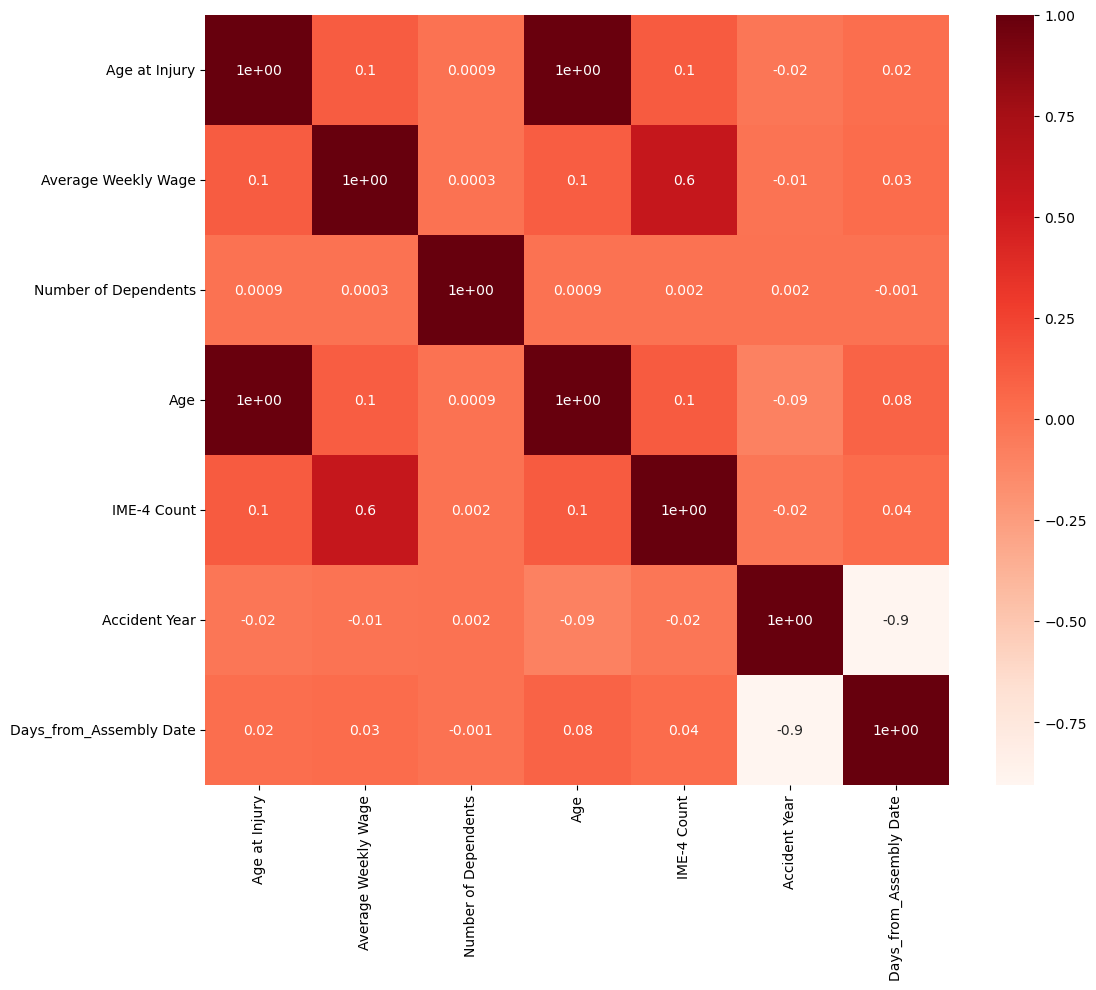

In [93]:
functions.cor_heatmap(X_train_num_corr)

According to the correlation heatmap, the pairs of features below are redundant (∣correlation∣≥0.8) and one of them should be dropped:
- Age and Age at Injury (0.991720)
- Accident Year and Days from Assembly (-0.904513)

<a class="anchor" id="sub-section-2_8_3"> </a>

###  2.8.3. Chi-Square

</a>


The Chi-square test can help determine if there is a significant association between each categorical feature and the target.

In [94]:
# Get the categorical varibles from X_train_scaled
X_train_cat = [col for col in X_train_scaled if col not in numerical_columns]

In [95]:
# Test each variables against the target
for var in X_train[X_train_cat]:
    functions.TestIndependence(X_train_cleaned[X_train_cat][var],y_train, var)

Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
Carrier Name is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Industry Code is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
WCIO Cause of Injury Code is IMPORTANT for Prediction
WCIO Nature of Injury Code is IMPORTANT for Prediction
WCIO Part Of Body Code is IMPORTANT for Prediction
Zip Code is IMPORTANT for Prediction
Agreement Reached is IMPORTANT for Prediction
C3_Received is IMPORTANT for Prediction
C2_Received is IMPORTANT for Prediction
First_Hearing is IMPORTANT for Prediction
Has_Dependents is NOT an important predictor. (Discard Has_Dependents from model)


<a class="anchor" id="sub-section-2_8_4"> </a>

###  2.8.4. Wrapper Methods - RFE

</a>

In [96]:
numerical_binary= ['Age at Injury','Average Weekly Wage','Number of Dependents','Age','IME-4 Count','Accident Year',
                   'Days_from_Assembly Date','Alternative Dispute Resolution','Attorney/Representative', 'COVID-19 Indicator',
                   'Agreement Reached', 'C3_Received','C2_Received', 'First_Hearing', 'Has_Dependents']

In [97]:
# Define the number of features to evaluate (from 1 to 15 features)
nof_list = np.arange(1, 16)

# Variables/lists to store the best score and number of features
high_score = 0
nof = 0           
train_score_list = []
val_score_list = []

# Iterate over each possible number of features (from 1 to 7)
for n in range(len(nof_list)):
    
    # Initialize a logistic regression model
    model = LogisticRegression()
    
    # Perform RFE to select 'n' features
    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    
    # Apply RFE to the training & validation data, selecting the top 'n' features
    X_train_rfe = rfe.fit_transform(X_train_scaled[numerical_binary], y_train)
    X_val_rfe = rfe.transform(X_val_scaled[numerical_binary])
    
    # Fit the logistic regression model on the selected features from the training data
    model.fit(X_train_rfe, y_train)
    
    # Predict for the training and validation datasets
    y_train_pred = model.predict(X_train_rfe)
    y_val_pred = model.predict(X_val_rfe)
    
    # Calculate the ROC AUC score on the training and validation data
    train_score = roc_auc_score(y_train, model.predict_proba(X_train_rfe), multi_class='ovr')
    train_score_list.append(train_score)
    
    val_score = roc_auc_score(y_val, model.predict_proba(X_val_rfe), multi_class='ovr')
    val_score_list.append(val_score)
    
    # Check if the current validation score is higher than the best score so far
    if val_score >= high_score:
        high_score = val_score
        nof = nof_list[n]

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.889622


In [98]:
# Initialize the RFE model with a Logistic Regression estimator & set number of features to 10
rfe = RFE(estimator = model, n_features_to_select = 10)

# Apply RFE to the scaled training data with the specified numerical columns
X_rfe = rfe.fit_transform(X = X_train_scaled[numerical_binary], y = y_train)

In [99]:
# Create a pandas Series to see if a feature is selected or not
selected_features = pd.Series(rfe.support_, index = X_train_scaled[numerical_binary].columns)
selected_features

Age at Injury                     False
Average Weekly Wage                True
Number of Dependents              False
Age                               False
IME-4 Count                        True
Accident Year                      True
Days_from_Assembly Date           False
Alternative Dispute Resolution     True
Attorney/Representative            True
COVID-19 Indicator                 True
Agreement Reached                  True
C3_Received                        True
C2_Received                        True
First_Hearing                      True
Has_Dependents                    False
dtype: bool

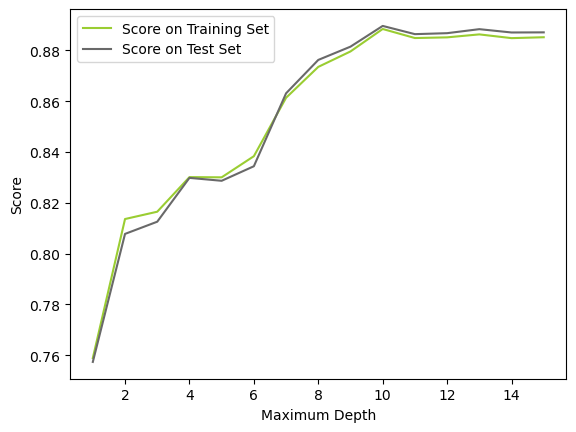

In [100]:
# Plot how training accuracy and validation accuracy vary with the number of features
plt.plot(list(range(1,16)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,16)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

<a class="anchor" id="sub-section-2_8_5"> </a>

### 2.8.5. Embedded Methods - Lasso

</a>

In [101]:
# Initializing a Lasso Regression
Lreg = LassoCV()

In [102]:
# Fit the data to the regression 
Lreg.fit(X_train_scaled[numerical_binary], y_train)

LassoCV()

In [103]:
coef = pd.Series(Lreg.coef_, index = X_train_scaled[numerical_binary].columns)
coef

Age at Injury                    -0.000000
Average Weekly Wage               3.252434
Number of Dependents             -0.000000
Age                               0.026798
IME-4 Count                       0.363072
Accident Year                    -0.179566
Days_from_Assembly Date           0.023436
Alternative Dispute Resolution    0.521921
Attorney/Representative           0.360860
COVID-19 Indicator               -0.100989
Agreement Reached                 0.382364
C3_Received                       0.027537
C2_Received                       0.855470
First_Hearing                    -0.008183
Has_Dependents                    0.000000
dtype: float64

<a class="anchor" id="sub-section-2_8_6"> </a>

### 2.8.6. Final Drops

</a>

Variables to drop according to feature selection:
- Correlation indices: 'Age' or 'Age at Injury', 'Accident Year' or 'Days_from_Assembly Date'  
- Chi-Squared: 'Has_Dependents'
- RFE: 'Age at Injury', 'Number of Dependents', 'Age', 'Days_from_Assembly Date', 'Has_Dependents'  
- Lasso: 'Number of Dependents', 'Has_Dependents', 'Age at Injury'

Final considerations: <br>
- We will remove the  variable who fail in all aplicable tests 
- For example, 'Has_Dependents' was flagged in the Chi-Squared, RFE and Lasso tests.
- For numerical variables, we will drop 'Number of Dependents' and 'Age at Injury'
- Regarding the second pair of correlated variables. 'Days_from_Assembly Date' will be dropped as it was flagged in RFE test and has a lower score than 'Accident Year' in the Lasso test.

In [104]:
# For the open-ended section
y_train_agr = X_train_scaled["Agreement Reached"]
y_val_agr = X_val_scaled["Agreement Reached"]

In [105]:
X_train_scaled.drop('Number of Dependents', axis=1, inplace=True)
X_val_scaled.drop('Number of Dependents', axis=1, inplace=True)
test.drop('Number of Dependents', axis=1, inplace=True)

In [106]:
X_train_scaled.drop('Days_from_Assembly Date', axis=1, inplace=True)
X_val_scaled.drop('Days_from_Assembly Date', axis=1, inplace=True)
test.drop('Days_from_Assembly Date', axis=1, inplace=True)

In [107]:
# Need to drop agreement reached because it is not in test
X_train_scaled.drop('Agreement Reached', axis=1, inplace=True)
X_val_scaled.drop('Agreement Reached', axis=1, inplace=True)
test.drop('Agreement Reached', axis=1, inplace=True)

In [108]:
# To use for the other model
X_train_agr = X_train_scaled.copy()
X_val_agr = X_val_scaled.copy()

In [109]:
X_train_scaled.drop('Has_Dependents', axis=1, inplace=True)
X_val_scaled.drop('Has_Dependents', axis=1, inplace=True)
#test.drop('Has_Dependents', axis=1, inplace=True) # Uncomment depending on open section or not

In [110]:
X_train_scaled.drop('Age at Injury', axis=1, inplace=True)
X_val_scaled.drop('Age at Injury', axis=1, inplace=True)
#test.drop('Age at Injury', axis=1, inplace=True) # Uncomment depending on open section or not

<a class="anchor"  id="chapter3"></a>

# 3. Modeling

</a>

This problem is a multi-class classification problem as we aim to predict a target with several categories. Some relevant models include: K-Nearest Neighbors, Gradient Boosting, Naive Bayes classifier, decision trees, logistic regression. It's important to note that some models need some adjustments to work on this type of problem.

To assess the performance of the models, we will use the following metrics:
   -  Accuracy: because it gives a general overview of the  model performance (but is not that useful on unbalanced data)
   -  Macro F1 score: to test if the model performs well across all target classes
   -  Weighted F1 Score: because it considers the proportion of each class and gives a more general view of the model
   -  Same metrics but by class: to see which classes have better and worse predictions
   -  Confusion matrix: has the details of the predictions to see where the model is making the most misclassifications

To see some of these metrics, we used classification_report that also includes other metrics (e.g. precision and recall).

<a class="anchor" id="sub-section-3_1"></a>

## 3.1. Models

</a>

<a class="anchor" id="sub-section-3_1_1"></a>

### 3.1.1. Logistic Regression

</a>

In [111]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [112]:
# Predict the target variable on the validation set
log_predictions = log_model.predict(X_val_scaled)
log_train_predictions = log_model.predict(X_train_scaled)

In [113]:
# Model's performance
print("Logistic Regression Model Performance:")
f1_train_LR=f1_score(y_train, log_train_predictions, average='macro')
f1_val_LR=f1_score(y_val, log_predictions, average='macro')

print('Accuracy on Train Set:', accuracy_score(y_train, log_train_predictions))
print('Training F1 Macro:', f1_train_LR)
print('Accuracy on Validation Set:', accuracy_score(y_val, log_predictions))

Logistic Regression Model Performance:
Accuracy on Train Set: 0.7606441357083751
Training F1 Macro: 0.3375523723202124
Accuracy on Validation Set: 0.7614302512956753


In [114]:
class_report = classification_report(y_val, log_predictions, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0,0.684762,0.444890,0.539359,2495.00000
1,0.836432,0.975282,0.900536,58216.00000
2,0.328125,0.050287,0.087208,13781.00000
3,0.675875,0.858355,0.756263,29701.00000
4,0.611304,0.346106,0.441976,9656.00000
5,0.000000,0.000000,0.000000,842.00000
6,0.000000,0.000000,0.000000,20.00000
7,0.000000,0.000000,0.000000,94.00000
accuracy,0.761430,0.761430,0.761430,0.76143
macro avg,0.392062,0.334365,0.340668,114805.00000


In [115]:
conf_matrix = confusion_matrix(y_val, log_predictions)
conf_matrix = pd.DataFrame(conf_matrix)
print('Confusion Matrix for Validation:')
conf_matrix

Confusion Matrix for Validation:


,0,1,2,3,4,5,6,7
0,1110,1284,57,42,2,0,0,0
1,454,56777,449,514,22,0,0,0
2,26,7709,693,4937,415,1,0,0
3,30,1922,690,25494,1562,2,0,1
4,1,167,193,5953,3342,0,0,0
5,0,3,23,698,118,0,0,0
6,0,0,0,16,3,1,0,0
7,0,18,7,66,3,0,0,0


<a class="anchor" id="sub-section-3_1_2"></a>

### 3.1.2. Naive Bayes
</a>

In [116]:
modelNB = GaussianNB(var_smoothing=0.0001)

In [117]:
modelNB.fit(X = X_train_scaled, y = y_train)

GaussianNB(var_smoothing=0.0001)

In [118]:
y_train_pred_NB = modelNB.predict(X_train_scaled)
y_val_pred_NB = modelNB.predict(X_val_scaled)

In [119]:
f1_train_NB=f1_score(y_train, y_train_pred_NB, average='macro')
f1_val_NB=f1_score(y_val, y_val_pred_NB, average='macro')

print('Accuracy on Train Set:', accuracy_score(y_train, y_train_pred_NB))
print('Training F1 Macro:', f1_train_NB)
print('Accuracy on Validation Set:', accuracy_score(y_val, y_val_pred_NB))

Accuracy on Train Set: 0.5882147990070119
Training F1 Macro: 0.3259279505831902
Accuracy on Validation Set: 0.5860894560341449


In [120]:
class_report = classification_report(y_val, y_val_pred_NB, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0,0.451279,0.558717,0.499284,2495.000000
1,0.881121,0.846657,0.863545,58216.000000
2,0.210776,0.286409,0.242840,13781.000000
3,0.708764,0.203124,0.315756,29701.000000
4,0.424881,0.618268,0.503649,9656.000000
5,0.049642,0.682898,0.092555,842.000000
6,0.006700,0.200000,0.012966,20.000000
7,0.032062,0.787234,0.061615,94.000000
accuracy,0.586089,0.586089,0.586089,0.586089
macro avg,0.345653,0.522914,0.324026,114805.000000


In [121]:
conf_matrix = confusion_matrix(y_val, y_val_pred_NB)
conf_matrix = pd.DataFrame(conf_matrix)
print('Confusion Matrix for Validation:')
conf_matrix

Confusion Matrix for Validation:


,0,1,2,3,4,5,6,7
0,1394,594,398,18,15,2,0,74
1,1334,49289,6619,216,113,17,6,622
2,58,5455,3947,1497,1568,701,36,519
3,297,589,7285,6033,6219,8016,401,861
4,5,12,457,703,5970,2260,110,139
5,0,0,14,43,157,575,37,16
6,1,0,0,0,3,9,4,3
7,0,0,6,2,6,3,3,74


<a class="anchor" id="sub-section-3_1_3"></a>

### 3.1.3. KNN
</a>

In [122]:
knn = KNeighborsClassifier()  

In [123]:
knn.fit(X_train_scaled, y_train)
y_pred_val_knn = knn.predict(X_val_scaled)
y_pred_train_knn = knn.predict(X_train_scaled)

In [124]:
f1_train_KNN=f1_score(y_train, y_pred_train_knn, average='macro')
f1_val_KNN=f1_score(y_val, y_pred_val_knn, average='macro')

print('Accuracy on Train Set:', accuracy_score(y_train, y_pred_train_knn))
print('Training F1 Macro:', f1_train_KNN)
print('Accuracy on Validation Set:', accuracy_score(y_val, y_pred_val_knn))

Accuracy on Train Set: 0.8097426070293106
Training F1 Macro: 0.4803498658278543
Accuracy on Validation Set: 0.7548451722485955


In [125]:
class_report = classification_report(y_val, y_pred_val_knn, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0,0.628941,0.487776,0.549436,2495.000000
1,0.847814,0.952728,0.897214,58216.000000
2,0.296484,0.131558,0.182248,13781.000000
3,0.702207,0.794956,0.745709,29701.000000
4,0.596660,0.469863,0.525724,9656.000000
5,0.025641,0.002375,0.004348,842.000000
6,0.000000,0.000000,0.000000,20.000000
7,0.551724,0.170213,0.260163,94.000000
accuracy,0.754845,0.754845,0.754845,0.754845
macro avg,0.456184,0.376184,0.395605,114805.000000


In [126]:
conf_matrix = confusion_matrix(y_val, y_pred_val_knn)
conf_matrix = pd.DataFrame(conf_matrix)
print('Confusion Matrix for Validation:')
conf_matrix

Confusion Matrix for Validation:


,0,1,2,3,4,5,6,7
0,1217,1127,73,72,6,0,0,0
1,544,55464,1549,622,36,0,0,1
2,93,7088,1813,4226,555,5,0,1
3,68,1544,2099,23611,2315,53,0,11
4,10,173,524,4394,4537,18,0,0
5,1,6,46,641,146,2,0,0
6,0,0,1,17,2,0,0,0
7,2,18,10,41,7,0,0,16


<a class="anchor" id="sub-section-3_1_4"></a>

### 3.1.4. Decision Tree
</a>

In [127]:
DT = DecisionTreeClassifier(random_state=42)

In [128]:
DT.fit(X_train_scaled, y_train)
y_pred_val_DT = DT.predict(X_val_scaled)
y_pred_train_DT = DT.predict(X_train_scaled)

In [129]:
f1_train_DT=f1_score(y_train, y_pred_train_DT, average='macro')
f1_val_DT=f1_score(y_val, y_pred_val_DT, average='macro')

print('Accuracy on Train Set:', accuracy_score(y_train, y_pred_train_DT))
print('Training F1 Macro:', f1_train_DT)
print('Accuracy on Validation Set:', accuracy_score(y_val, y_pred_val_DT))

Accuracy on Train Set: 0.999838857192631
Training F1 Macro: 0.9989180493909744
Accuracy on Validation Set: 0.6811550019598449


In [130]:
class_report = classification_report(y_val, y_pred_val_DT, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0,0.432321,0.462124,0.446726,2495.000000
1,0.856030,0.836385,0.846094,58216.000000
2,0.206924,0.229446,0.217604,13781.000000
3,0.687169,0.671829,0.679412,29701.000000
4,0.519008,0.533036,0.525929,9656.000000
5,0.083598,0.093824,0.088416,842.000000
6,0.000000,0.000000,0.000000,20.000000
7,0.191781,0.148936,0.167665,94.000000
accuracy,0.681155,0.681155,0.681155,0.681155
macro avg,0.372104,0.371948,0.371481,114805.000000


In [131]:
conf_matrix = confusion_matrix(y_val, y_pred_val_DT)
conf_matrix = pd.DataFrame(conf_matrix)
print('Confusion Matrix for Validation:')
conf_matrix

Confusion Matrix for Validation:


,0,1,2,3,4,5,6,7
0,1153,1050,171,101,17,2,0,1
1,1229,48691,6766,1390,130,5,0,5
2,173,5737,3162,3743,870,80,1,15
3,103,1229,4199,19954,3581,597,3,35
4,8,150,880,3295,5147,176,0,0
5,0,12,87,500,161,79,0,3
6,0,0,3,15,0,2,0,0
7,1,11,13,40,11,4,0,14


<a class="anchor" id="sub-section-3_1_5"></a>

### 3.1.5. Gradient Boosting

</a>

In [132]:
GB = xgb.XGBClassifier(random_state=42, verbosity=1)

In [133]:
GB.fit(X_train_scaled, y_train)
y_pred_val_GB = GB.predict(X_val_scaled)
y_pred_train_GB = GB.predict(X_train_scaled)

In [134]:
f1_train_GB=f1_score(y_train, y_pred_train_GB, average='macro')
f1_val_GB=f1_score(y_val, y_pred_val_GB, average='macro')

print('Accuracy on Train Set:', accuracy_score(y_train, y_pred_train_GB))
print('Training F1 Macro:', f1_train_GB)
print('Accuracy on Validation Set:', accuracy_score(y_val, y_pred_val_GB))

Accuracy on Train Set: 0.8019337136884283
Training F1 Macro: 0.6341167674905017
Accuracy on Validation Set: 0.7908105047689561


In [135]:
class_report = classification_report(y_val, y_pred_val_GB, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0,0.733683,0.504609,0.597958,2495.000000
1,0.848045,0.977635,0.908241,58216.000000
2,0.491900,0.072709,0.126691,13781.000000
3,0.726982,0.865594,0.790256,29701.000000
4,0.690513,0.606773,0.645940,9656.000000
5,0.411765,0.008314,0.016298,842.000000
6,0.000000,0.000000,0.000000,20.000000
7,0.534247,0.414894,0.467066,94.000000
accuracy,0.790811,0.790811,0.790811,0.790811
macro avg,0.554642,0.431316,0.444056,114805.000000


In [136]:
conf_matrix = confusion_matrix(y_val, y_pred_val_GB)
conf_matrix = pd.DataFrame(conf_matrix)
print('Confusion Matrix for Validation:')
conf_matrix

Confusion Matrix for Validation:


,0,1,2,3,4,5,6,7
0,1259,1132,35,63,5,0,0,1
1,414,56914,392,461,31,0,0,4
2,22,7409,1002,4796,545,1,0,6
3,16,1521,484,25709,1941,8,1,21
4,3,119,113,3561,5859,1,0,0
5,0,4,7,720,103,7,0,1
6,0,0,1,18,0,0,0,1
7,2,13,3,36,1,0,0,39


<a class="anchor" id="sub-section-3_1_6"></a>

### 3.1.6. Random Forest Classifier

</a>

In [137]:
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')

rfc.fit(X_train_scaled, y_train)
y_pred_val_RF = rfc.predict(X_val_scaled)
y_pred_train_RF = rfc.predict(X_train_scaled)

In [138]:
f1_train_RF=f1_score(y_train, y_pred_train_RF, average='macro')
f1_val_RF=f1_score(y_val, y_pred_val_RF, average='macro')

print('Accuracy on Train Set:', accuracy_score(y_train, y_pred_train_RF))
print('Training F1 Macro:', f1_train_RF)
print('Accuracy on Validation Set:', accuracy_score(y_val, y_pred_val_RF))

Accuracy on Train Set: 0.9998127259265711
Training F1 Macro: 0.9989135116220669
Accuracy on Validation Set: 0.786725316841601


In [139]:
class_report = classification_report(y_val, y_pred_val_RF, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0,0.749842,0.475752,0.582148,2495.000000
1,0.847673,0.975488,0.907100,58216.000000
2,0.476289,0.067049,0.117550,13781.000000
3,0.703565,0.897074,0.788622,29701.000000
4,0.745694,0.493165,0.593692,9656.000000
5,0.142857,0.001188,0.002356,842.000000
6,0.000000,0.000000,0.000000,20.000000
7,0.520000,0.138298,0.218487,94.000000
accuracy,0.786725,0.786725,0.786725,0.786725
macro avg,0.523240,0.381002,0.401244,114805.000000


In [140]:
conf_matrix = confusion_matrix(y_val, y_pred_val_RF)
conf_matrix = pd.DataFrame(conf_matrix)
print('Confusion Matrix for Validation:')
conf_matrix

Confusion Matrix for Validation:


,0,1,2,3,4,5,6,7
0,1187,1202,35,68,3,0,0,0
1,360,56789,432,611,23,0,0,1
2,22,7369,924,5064,398,1,0,3
3,14,1482,431,26644,1119,3,0,8
4,0,129,114,4649,4762,2,0,0
5,0,3,4,753,81,1,0,0
6,0,0,0,20,0,0,0,0
7,0,20,0,61,0,0,0,13


<a class="anchor" id="sub-section-3_1_7"></a>

### 3.1.7. Neural Networks

</a>

In [141]:
NN = MLPClassifier(random_state=42)

In [142]:
NN.fit(X_train_scaled, y_train)
y_pred_val_NN = NN.predict(X_val_scaled)
y_pred_train_NN = NN.predict(X_train_scaled)

In [143]:
f1_train_NN=f1_score(y_train, y_pred_train_NN, average='macro')
f1_val_NN=f1_score(y_val, y_pred_val_NN, average='macro')

print('Accuracy on Train Set:', accuracy_score(y_train, y_pred_train_NN))
print('Training F1 Macro:', f1_train_NN)
print('Accuracy on Validation Set:', accuracy_score(y_val, y_pred_val_NN))

Accuracy on Train Set: 0.7837942598318889
Training F1 Macro: 0.43974264651394224
Accuracy on Validation Set: 0.7827533644005052


In [144]:
class_report = classification_report(y_val, y_pred_val_NN, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0,0.728173,0.471343,0.572263,2495.000000
1,0.844407,0.976038,0.905463,58216.000000
2,0.450000,0.079675,0.135380,13781.000000
3,0.723059,0.841958,0.777992,29701.000000
4,0.650415,0.592688,0.620211,9656.000000
5,1.000000,0.001188,0.002372,842.000000
6,0.000000,0.000000,0.000000,20.000000
7,0.520548,0.404255,0.455090,94.000000
accuracy,0.782753,0.782753,0.782753,0.782753
macro avg,0.614575,0.420893,0.433596,114805.000000


In [145]:
conf_matrix = confusion_matrix(y_val, y_pred_val_NN)
conf_matrix = pd.DataFrame(conf_matrix)
print('Confusion Matrix for Validation:')
conf_matrix

Confusion Matrix for Validation:


,0,1,2,3,4,5,6,7
0,1176,1214,32,65,7,0,0,1
1,400,56821,401,551,41,0,0,2
2,23,7467,1098,4598,590,0,0,5
3,13,1637,727,25007,2293,0,1,23
4,2,134,164,3630,5723,0,0,3
5,0,2,11,687,140,1,0,1
6,0,0,0,20,0,0,0,0
7,1,16,7,27,5,0,0,38


<a class="anchor" id="sub-section-3_1_8"></a>

### 3.1.8. Comparing Models

</a>

In [146]:
models=['LR','NB','DT','KNN','GB','RF','NN']
models_names=['Logistic Regression','Naive Bayes', 'Decision Tree', 'K-Nearest Neighbors','Gradient Boosting', 'Random Forest','Neural Network']
train_scores = {f'f1_train_{model}': globals()[f'f1_train_{model}'] for model in models}
val_scores = {f'f1_val_{model}': globals()[f'f1_val_{model}'] for model in models}

df = pd.DataFrame(columns = ['Macro F1 Score Train','Macro F1 Score Val'], index = models_names)
functions.compare_model_f1_scores(df, models,train_scores,val_scores)

,Macro F1 Score Train,Macro F1 Score Val
Logistic Regression,0.337552,0.340668
Naive Bayes,0.325928,0.324026
Decision Tree,0.998918,0.371481
K-Nearest Neighbors,0.48035,0.395605
Gradient Boosting,0.634117,0.444056
Random Forest,0.998914,0.401244
Neural Network,0.439743,0.433596


Best 4 models: Neural Networks, K-Nearest Neighbors, Gradient Boosting, Random Forest	

<a class="anchor" id="sub-section-3_2"></a>

## 3.2. Optimization
</a>

<a class="anchor" id="sub-section-3_2.1"></a>

### 3.2.1. Oversampling
</a>

As mentioned, our data is highly unbalanced, and some classes have significantly fewer instances. For example, Permanent Total Disability only has 97 occurences and Death has 470 occurances, which is significantly less than Non-Compensable with 291078 counts. This imbalance can lead to poor performance on some classes, as we have seen in the classification_report across all models tested. To address this issue and in an attempt to improve our predictions, we tried using SMOTE (Synthetic Minority Oversampling Technique). We are going to test our best models with SMOTE.

In [147]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

#models = {
#    'NN': MLPClassifier(random_state=42),
#    'KNN': KNeighborsClassifier(),
#    'RF': RandomForestClassifier(random_state=42),
#    'GB': xgb.XGBClassifier(random_state=42)
#}

#for model_name in models:
#    model = models[model_name]
#    model.fit(X_resampled, y_resampled) 
#    y_pred = model.predict(X_val_scaled)
#    y_pred_train = model.predict(X_resampled)
#    f1_macro = f1_score(y_val, y_pred, average='macro')
#    f1_macro_train = f1_score(y_resampled, y_pred_train, average='macro')


#    print(f"{model_name}, F1 Macro Score Val: {f1_macro}, F1 Macro Train :{f1_macro_train}\n,{f1_macro_train_r}")

Results:
- NN, F1 Macro Score Val: 0.3897834200470847, F1 Macro Train :0.7455728723093065
- KNN, F1 Macro Score Val: 0.3606285492284639, F1 Macro Train:0.9492687024999497
- RF, F1 Macro Score Val: 0.4467123961854067, F1 Macro Train 0.9999575928364732
- GB, F1 Macro Score Val: 0.4602631952122069, F1 Macro Train Val: 0.8402889876906404

In [148]:
GB.fit(X_resampled, y_resampled) 
y_pred = GB.predict(X_val_scaled)
class_report = classification_report(y_val, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0,0.581839,0.598397,0.590002,2495.000000
1,0.854282,0.960011,0.904066,58216.000000
2,0.449326,0.101662,0.165809,13781.000000
3,0.743532,0.794451,0.768149,29701.000000
4,0.630341,0.666114,0.647734,9656.000000
5,0.144073,0.261283,0.185732,842.000000
6,0.058824,0.050000,0.054054,20.000000
7,0.262673,0.606383,0.366559,94.000000
accuracy,0.775994,0.775994,0.775994,0.775994
macro avg,0.465611,0.504788,0.460263,114805.000000


From the results, we can see that the macro F1-score on validation increases and that i helped predict the minority class, but we will not use it as it is overfitting more.

<a class="anchor" id="sub-section-3_2_2"></a>

### 3.2.2. Hyperparameter tuning
</a>

In this section, we attempt to find the best parameters for our 4 best models. We used to RandomizedSearchCV() for large parameter spaces for more efficiency and GridSearchCV() for smaller parameter spaces.

In [149]:
#Defining the predfinef split for gird search with the indexes of val ans train to avoid data leakage
X_combined = np.concatenate([X_train_scaled, X_val_scaled])
y_combined = np.concatenate([y_train, y_val])
test_fold = [-1] * len(X_train_scaled) + [0] * len(X_val_scaled)
ps = PredefinedSplit(test_fold=test_fold)

<a class="anchor" id="sub-section-3_2_2_1"></a>

#### 3.2.2.1. Gradient Boosting
</a>

In [150]:
#parameter_space = {
#    'n_estimators': [100, 300, 500], # Number of boosting rounds
#    'max_depth': [3, 6, 10], # Depth of the trees
#    'learning_rate': [0.05, 0.1, 0.2], # A smaller learning rate is better with more trees
#    'subsample': [0.8, 1.0], # Fraction of samples used for each boosting round
#    'colsample_bytree': [0.8, 1.0], # Fraction of features used for each tree
#    'gamma': [0, 0.2, 0.4], # Minimum loss reduction required to make a further partition
#    'alpha': [0,0.1, 0.5],  # L1 regularization term on weights      
#    'lambda': [0, 1, 2],# L2 regularization term on weights     
#    'min_child_weight':[1,5,10] #Sum of instance weights in a child node 
#}

#clf_gb = RandomizedSearchCV(estimator=GB,param_distributions=parameter_space,scoring='f1_macro',
#                            verbose=4,cv=ps,n_jobs=-1,random_state=42,n_iter=1000)

#clf_gb.fit(X_combined, y_combined)

#print("Best hyperparameters:", clf_gb.best_params_)
#print("Best Score:", clf_gb.best_score_)

In [151]:
GB_tuned = xgb.XGBClassifier( colsample_bytree= 0.8,gamma=0.2, learning_rate= 0.2, max_depth=6, n_estimators= 500, subsample= 1,alpha=0,
                             lambda_=1,  min_child_weight=10,random_state = 42, verbosity=1)

In [152]:
GB_tuned.fit(X_train_scaled, y_train)
y_pred_val_GB_tuned = GB_tuned.predict(X_val_scaled)
y_pred_train_GB_tuned = GB_tuned.predict(X_train_scaled)

In [153]:
# Metrics for assessment
f1_val_tuned_GB=f1_score(y_val, y_pred_val_GB_tuned, average='macro')

print('Accuracy on Train Set:', accuracy_score(y_train, y_pred_train_GB_tuned))
print('Training F1 Macro:', f1_score(y_train, y_pred_train_GB_tuned, average='macro'))
print('Accuracy on Validation Set:', accuracy_score(y_val, y_pred_val_GB_tuned))
print('Validation F1 Macro:',f1_val_tuned_GB)

Accuracy on Train Set: 0.8047188711293062
Training F1 Macro: 0.531707672267614
Accuracy on Validation Set: 0.791968990897609
Validation F1 Macro: 0.44681382884925847


<a class="anchor" id="sub-section-3_2_2_2"></a>

#### 3.2.2.2.  Random Forest
</a>

In [154]:
#parameter_space = {
#    'n_estimators': [100, 200],
#    'max_depth': [7, 10, 15, 30, None],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [2, 4, 8],
#    'max_features': ['sqrt', None, 0.5],
#    'bootstrap': [True,False],
#    'criterion': ['entropy','gini'],
#    'class_weight': [None, 'balanced', 'balanced_subsample'],  # Class balancing
#}

rf = RandomForestClassifier(random_state=42)

#clf_rf = RandomizedSearchCV(estimator=rf,param_distributions=parameter_space,scoring='f1_macro',
                            #verbose=4,cv=ps,n_jobs=-1,random_state=42,n_iter=500)

#clf_rf.fit(X_combined, y_combined)

#print("Best hyperparameters:", clf_rf.best_params_)
#print("Best Score:", clf_rf.best_score_)


In [155]:
RF_tuned = RandomForestClassifier(n_estimators=200, min_samples_split=5 ,min_samples_leaf=4, max_features='sqrt',
    max_depth=30, criterion='gini',class_weight='balanced', bootstrap=False, n_jobs=-1)

In [156]:
RF_tuned.fit(X_train_scaled, y_train)
y_pred_val_tuned_RF = RF_tuned.predict(X_val_scaled)
y_pred_train_tuned_RF = RF_tuned.predict(X_train_scaled)

In [157]:
# Metrics for assessment
f1_val_tuned_RF=f1_score(y_val, y_pred_val_tuned_RF, average='macro')

print('Accuracy on Train Set:', accuracy_score(y_train, y_pred_train_tuned_RF))
print('Training F1 Macro:', f1_score(y_train, y_pred_train_tuned_RF, average='macro'))
print('Accuracy on Validation Set:', accuracy_score(y_val, y_pred_val_tuned_RF))
print('Validation F1 Macro:',f1_val_tuned_RF)

Accuracy on Train Set: 0.9480684639170768
Training F1 Macro: 0.9115865092593525
Accuracy on Validation Set: 0.7663255084708854
Validation F1 Macro: 0.46711148353102006


<a class="anchor" id="sub-section-3_2_2_3"></a>

#### 3.2.2.3. KNN
</a>

In [158]:
#parameter_space = {
#    'n_neighbors': [1,2,4,3,5,6,7,8,9,10],  # Number of neighbors to consider
#    'weights': ['uniform', 'distance'],  # Weight function
#    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
#}

#knn=KNeighborsClassifier()

#clf_KNN = GridSearchCV(knn, parameter_space,scoring='f1_macro', verbose=4, cv=ps,n_jobs=-1)

#clf_KNN.fit(X_combined, y_combined)

#print("Best hyperparameters:", clf_KNN.best_params_)
# print("Best Score:", clf_KNN.best_score_)

In [159]:
KNN_tuned = KNeighborsClassifier(n_neighbors=9,  weights='distance' ,metric='manhattan' )

In [160]:
KNN_tuned.fit(X_train_scaled, y_train)
y_pred_val_tuned_KNN = KNN_tuned.predict(X_val_scaled)
y_pred_train_KNN_tuned = KNN_tuned.predict(X_train_scaled)

In [161]:
# Metrics for assessment
f1_val_tuned_KNN=f1_score(y_val, y_pred_val_tuned_KNN, average='macro')

print('Accuracy on Train Set:', accuracy_score(y_train, y_pred_train_KNN_tuned))
print('Training F1 Macro:', f1_score(y_train, y_pred_train_KNN_tuned, average='macro'))
print('Accuracy on Validation Set:', accuracy_score(y_val, y_pred_val_tuned_KNN))
print('Validation F1 Macro:',f1_val_tuned_KNN)

Accuracy on Train Set: 0.999838857192631
Training F1 Macro: 0.9989180493909744
Accuracy on Validation Set: 0.7666129523975437
Validation F1 Macro: 0.4025905526129015


<a class="anchor" id="sub-section-3_2_2_4"></a>

#### 3.2.2.4. Neural Networks
</a>

In [162]:
#parameter_space = {
#    'hidden_layer_sizes': [(50,), (10, 10), (100,)],
#    'solver': ['lbfgs', 'sgd', 'adam'],
#    'learning_rate': ['constant', 'adaptive', 'invscaling'],
#    'learning_rate_init': [0.001, 0.01, 0.05],
#}

#NN = MLPClassifier(random_state=42)

#clf_NN = GridSearchCV(NN, parameter_space,scoring='f1_macro', verbose=4, cv=ps,n_jobs=-1)

#clf_NN.fit(X_combined, y_combined)

#print("Best hyperparameters:", clf_NN.best_params_)
#print("Best Score:", clf_NN.best_score_)

In [163]:
NN_tuned = MLPClassifier(hidden_layer_sizes=(100,), learning_rate='constant',learning_rate_init=0.001,solver='adam',random_state=42)

In [164]:
NN_tuned.fit(X_train_scaled, y_train)
y_pred_val_tuned_NN = NN_tuned.predict(X_val_scaled)
y_pred_train_tuned_NN = NN_tuned.predict(X_train_scaled)

In [165]:
# Metrics for assessment
f1_val_tuned_NN=f1_score(y_val, y_pred_val_tuned_NN, average='macro')

print('Accuracy on Train Set:', accuracy_score(y_train, y_pred_train_tuned_NN))
print('Training F1 Macro:', f1_score(y_train, y_pred_train_tuned_NN, average='macro'))
print('Accuracy on Validation Set:', accuracy_score(y_val, y_pred_val_tuned_NN))
print('Validation F1 Macro:',f1_val_tuned_NN)

Accuracy on Train Set: 0.7837942598318889
Training F1 Macro: 0.43974264651394224
Accuracy on Validation Set: 0.7827533644005052
Validation F1 Macro: 0.4335964998934349


<a class="anchor" id="sub-section-3_2_3"></a>

### 3.2.3. Comparing Results
</a>

In [166]:
models=['GB','RF','NN','KNN']
models_names=['Gradient Boosting', 'Random Forest','Neural Network','K-Nearest Neighbors']
default_scores = {f'f1_val_{model}': globals()[f'f1_val_{model}'] for model in models}
opt_scores = {f'f1_val_tuned_{model}': globals()[f'f1_val_tuned_{model}'] for model in models}

df = pd.DataFrame(columns = ['Macro F1 Score Default','Macro F1 Score Optimized'], index = models_names)
functions.compare_model_f1_scores_tuned(df, models,default_scores,opt_scores)

,Macro F1 Score Default,Macro F1 Score Optimized
Gradient Boosting,0.444056,0.446814
Random Forest,0.401244,0.467111
Neural Network,0.433596,0.433596
K-Nearest Neighbors,0.395605,0.402591


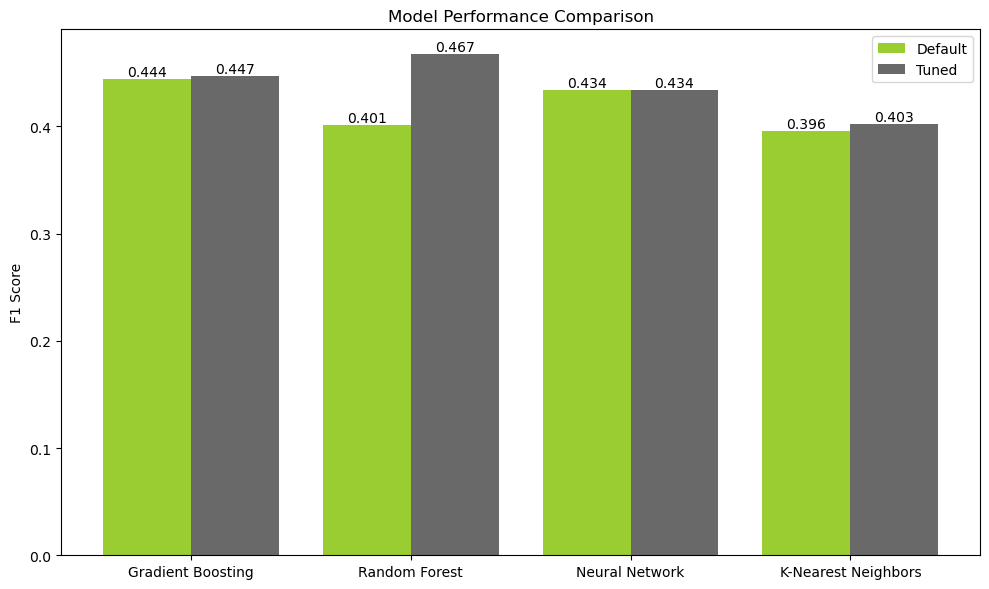

In [167]:
functions.plot_model_comparison(df)

We can observe that Gradient Boosting and KNN sligthly improved, while Neural Network did not change as it remained as default after tuning. Random Forest significantly improved, but overfitting continues to be an issue as seen when comparing train and validation sets. So, we decided on Gradient Boosting as our best model.

<a class="anchor" id="sub-section-3_3"></a>

## 3.3. Best Model
</a>

In [168]:
best_model=GB_tuned

In [169]:
f1_val_tuned_GB=f1_score(y_val, y_pred_val_GB_tuned, average='macro')

print('Accuracy on Train Set:', accuracy_score(y_train, y_pred_train_GB_tuned))
print('Training F1 Macro:', f1_score(y_train, y_pred_train_GB_tuned, average='macro'))
print('Accuracy on Validation Set:', accuracy_score(y_val, y_pred_val_GB_tuned))
print('Validation F1 Macro:',f1_val_tuned_GB)

Accuracy on Train Set: 0.8047188711293062
Training F1 Macro: 0.531707672267614
Accuracy on Validation Set: 0.791968990897609
Validation F1 Macro: 0.44681382884925847


In [170]:
class_report = classification_report(y_val, y_pred_val_GB_tuned, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0,0.736143,0.511022,0.603265,2495.000000
1,0.849176,0.977480,0.908822,58216.000000
2,0.505489,0.080183,0.138410,13781.000000
3,0.728688,0.865122,0.791066,29701.000000
4,0.692470,0.610501,0.648907,9656.000000
5,0.318182,0.008314,0.016204,842.000000
6,0.000000,0.000000,0.000000,20.000000
7,0.519481,0.425532,0.467836,94.000000
accuracy,0.791969,0.791969,0.791969,0.791969
macro avg,0.543704,0.434769,0.446814,114805.000000


<AxesSubplot: xlabel='Value', ylabel='Col'>

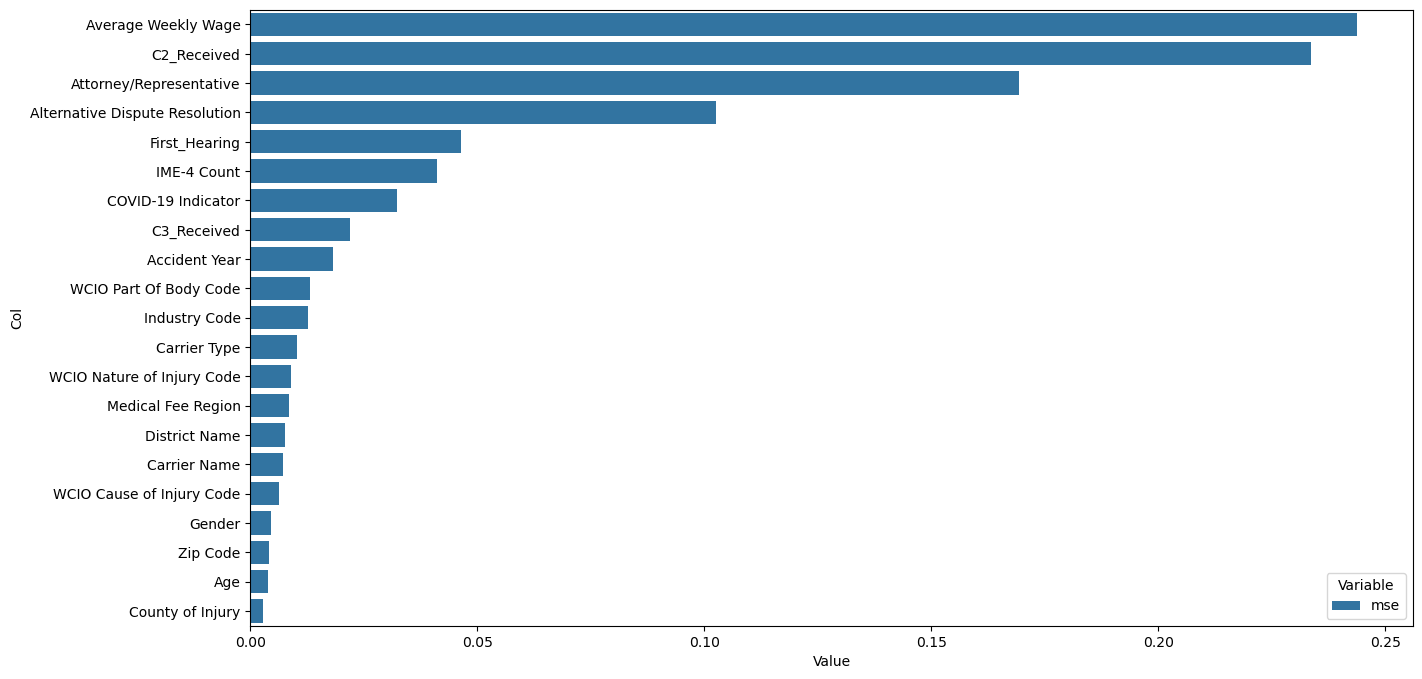

In [171]:
# Plot the importance of features to our best model
mse_importance = best_model.fit(X_train_scaled, y_train).feature_importances_

zippy = pd.DataFrame(zip(mse_importance), columns = ['mse'])
zippy['col'] = X_train_scaled.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

<a class="anchor"  id="chapter4"></a>

# 4. Open Ended Section

</a>

<a class="anchor" id="sub-section-4_1"></a>

## 4.1. Agreement Reached

</a>

***For more details on our open ended section, please refer to the notebook called "Group_12_AGR_notebook.ipynb".***

In [172]:
# Best model from the other notebook
model_agr = xgb.XGBClassifier(colsample_bytree=1.0,gamma=0.4,learning_rate=0.1,max_delta_step=3,max_depth=10,
    min_child_weight=5,n_estimators=300,reg_alpha=0, reg_lambda=2, scale_pos_weight=5,subsample=1.0, random_state=42)

In [173]:
# Columns used to predict agreement reached
agr_cols=['Age at Injury', 'Alternative Dispute Resolution',
          'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
          'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
          'District Name', 'Gender', 'IME-4 Count', 'Industry Code',
          'Medical Fee Region', 'WCIO Cause of Injury Code',
          'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
          'C3_Received', 'C2_Received', 'First_Hearing', 'Accident Year']

In [174]:
X_train_agr.columns

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'IME-4 Count', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Age', 'C3_Received', 'C2_Received', 'First_Hearing', 'Accident Year',
       'Has_Dependents'],
      dtype='object')

In [175]:
# Using agr_cols because the models for the dif. targets have use dif. variables
model_agr.fit(X_train_agr[agr_cols],y_train_agr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=3,
              max_depth=10, max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [176]:
X_val_agr['Agreement Reached']=model_agr.predict(X_val_agr[agr_cols])
X_train_agr['Agreement Reached']=model_agr.predict(X_train_agr[agr_cols])

In [177]:
# So both have the same columns
X_train_agr.drop('Age at Injury', axis=1, inplace=True)
X_val_agr.drop('Age at Injury', axis=1, inplace=True)
X_train_agr.drop('Has_Dependents', axis=1, inplace=True)
X_val_agr.drop('Has_Dependents', axis=1, inplace=True)

In [178]:
df = pd.DataFrame(columns = ['Without Agreement Reahed','With Agreement Reached'], index = ['Random Forest'])

# Test with  GB tuned 
functions.show_results(df,GB_tuned, X_train_scaled=X_train_scaled, y_train=y_train,X_val_scaled=X_val_scaled,y_val=y_val,X_train_agr=X_train_agr,X_val_agr=X_val_agr)  

,Without Agreement Reahed,With Agreement Reached
Random Forest,0.447,0.449


We can see that using Agreement Reached in our model slightly improved our F1-score, but did not have the impact we expected it to have. We thought it would have had more predictive power on Claim Injury Type.

<a class="anchor" id="sub-section-4_2"></a>

## 4.2. Interactive Dashboard

</a>

In [179]:
with open('claim_injury_model.pkl', 'wb') as file:
        pickle.dump(GB_tuned, file)

<a class="anchor"  id="chapter6"></a>

# 5. Deployment

</a>

In [180]:
# Check test with agreeement reached
#test['Agreement Reached']=model_agr.predict(test[agr_cols])

In [181]:
test.drop('Has_Dependents', axis=1, inplace=True)
test.drop('Age at Injury', axis=1, inplace=True)

In [182]:
# Predictions -- model.predict
test["Claim Injury Type"]=GB_tuned.predict(test)

In [183]:
# Reversing the encoder
test['Claim Injury Type'] = enc2.inverse_transform(test['Claim Injury Type'])

In [184]:
test=test[['Claim Injury Type']].copy()

In [185]:
# Results in the correct format
test.reset_index(inplace=True)
test.rename(columns={'index': 'Claim Identifier'}, inplace=True)
test.to_csv('submission_XGB.csv', index=False)